<h2> 5 Layer CNN</h2>
<hr>
CORN DATASET
<hr>
About the Dataset:
<br>
<br>Common Rust - 1306 images
<br>Gray Leaf Spot - 574 images
<br>Blight -1146 images
<br>Healthy - 1162 images
<hr>
<br>
Accuracy: 90%
<br>Image augmentation:<br>
Flip vertical , flip horizontal and sharpen


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
import pickle

X = pickle.load(open('/content/drive/MyDrive/Dataset/Corn/X.pickle', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/Dataset/Corn/y.pickle', 'rb'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

chanDim = 1

model = Sequential()
inputShape = (80, 80, 3)
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation("softmax"))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=25, epochs=25)


Epoch 1/25
153/153 [==============================] - 135s 859ms/step - loss: 0.8582 - accuracy: 0.6865
Epoch 2/25
153/153 [==============================] - 128s 833ms/step - loss: 0.6134 - accuracy: 0.7524
Epoch 3/25
153/153 [==============================] - 128s 837ms/step - loss: 0.5495 - accuracy: 0.7758
Epoch 4/25
153/153 [==============================] - 127s 833ms/step - loss: 0.4883 - accuracy: 0.8052
Epoch 5/25
153/153 [==============================] - 122s 801ms/step - loss: 0.4611 - accuracy: 0.8160
Epoch 6/25
153/153 [==============================] - 125s 818ms/step - loss: 0.4238 - accuracy: 0.8322
Epoch 7/25
153/153 [==============================] - 122s 801ms/step - loss: 0.4728 - accuracy: 0.8073
Epoch 8/25
153/153 [==============================] - 124s 812ms/step - loss: 0.4352 - accuracy: 0.8231
Epoch 9/25
153/153 [==============================] - 122s 799ms/step - loss: 0.3861 - accuracy: 0.8546
Epoch 10/25
153/153 [==============================] - 124s 813m

In [ ]:
# model.save("corn5layercnn.h5")

In [3]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

30/30 [==============================] - 9s 266ms/step - loss: 0.2945 - accuracy: 0.8888
Test Loss: 0.2944874167442322
Test Accuracy: 0.8887723088264465


In [4]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Test set metrics
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

test_precision = precision_score(y_test, test_pred, average='macro')
test_recall = recall_score(y_test, test_pred, average='macro')
test_f1_score = f1_score(y_test, test_pred, average='macro')

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


30/30 [==============================] - 9s 287ms/step
Test Precision: 0.8878360295227914
Test Recall: 0.888863528343513
Test F1 Score: 0.887454428738896


30/30 [==============================] - 15s 497ms/step


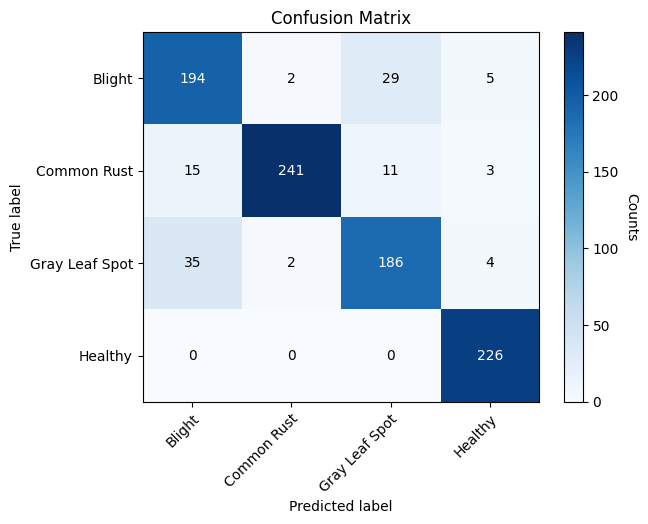

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtain predictions for the test set
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Create figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Counts', rotation=-90, va="bottom")

# Set axis labels and title
class_names = ['Blight', 'Common Rust', 'Gray Leaf Spot', 'Healthy']  # Replace with your class names
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix',
       aspect='auto')

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Show the plot
plt.show()
